In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [15]:
x_test.shape

(10000, 28, 28)

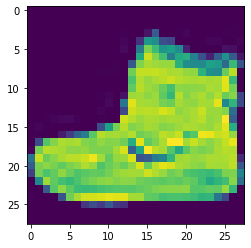

In [6]:
sample_img = plt.imshow(x_train[0])

In [7]:
x_train.max(), x_train.min()

(255, 0)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train, 10)

In [11]:
y_cat_test = to_categorical(y_test, 10)

In [12]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
x_train= x_train.reshape(60000, 28, 28, 1)
x_test= x_test.reshape(10000, 28, 28, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
                metrics=['accuracy'])

2022-08-12 22:46:30.245953: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-08-12 22:46:30.248878: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2419200000 Hz
2022-08-12 22:46:30.249138: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55850e363c20 executing computations on platform Host. Devices:
2022-08-12 22:46:30.249153: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [20]:
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test),
        callbacks=[early_stop])

2022-08-12 22:47:40.704744: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of system memory.
2022-08-12 22:47:41.250745: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 181us/sample - loss: 0.4067 - accuracy: 0.8550 - val_loss: 0.3247 - val_accuracy: 0.8837
Epoch 2/20
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2769 - accuracy: 0.8979 - val_loss: 0.2880 - val_accuracy: 0.8928
Epoch 3/20
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2300 - accuracy: 0.9150 - val_loss: 0.2623 - val_accuracy: 0.9050
Epoch 4/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.1986 - accuracy: 0.9258 - val_loss: 0.2561 - val_accuracy: 0.9079
Epoch 5/20
60000/60000 [==============================] - 14s 232us/sample - loss: 0.1736 - accuracy: 0.9345 - val_loss: 0.2657 - val_accuracy: 0.9097


In [21]:
model.evaluate(x_test, y_cat_test, verbose=0)

2022-08-12 22:49:01.078120: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


[0.26569200235307217, 0.9097]

In [22]:
predictions = model.predict_classes(x_test)

2022-08-12 22:49:12.288379: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       1.00      0.96      0.98      1000
           2       0.95      0.75      0.83      1000
           3       0.89      0.96      0.92      1000
           4       0.79      0.92      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.74      0.74      1000
           7       0.97      0.96      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



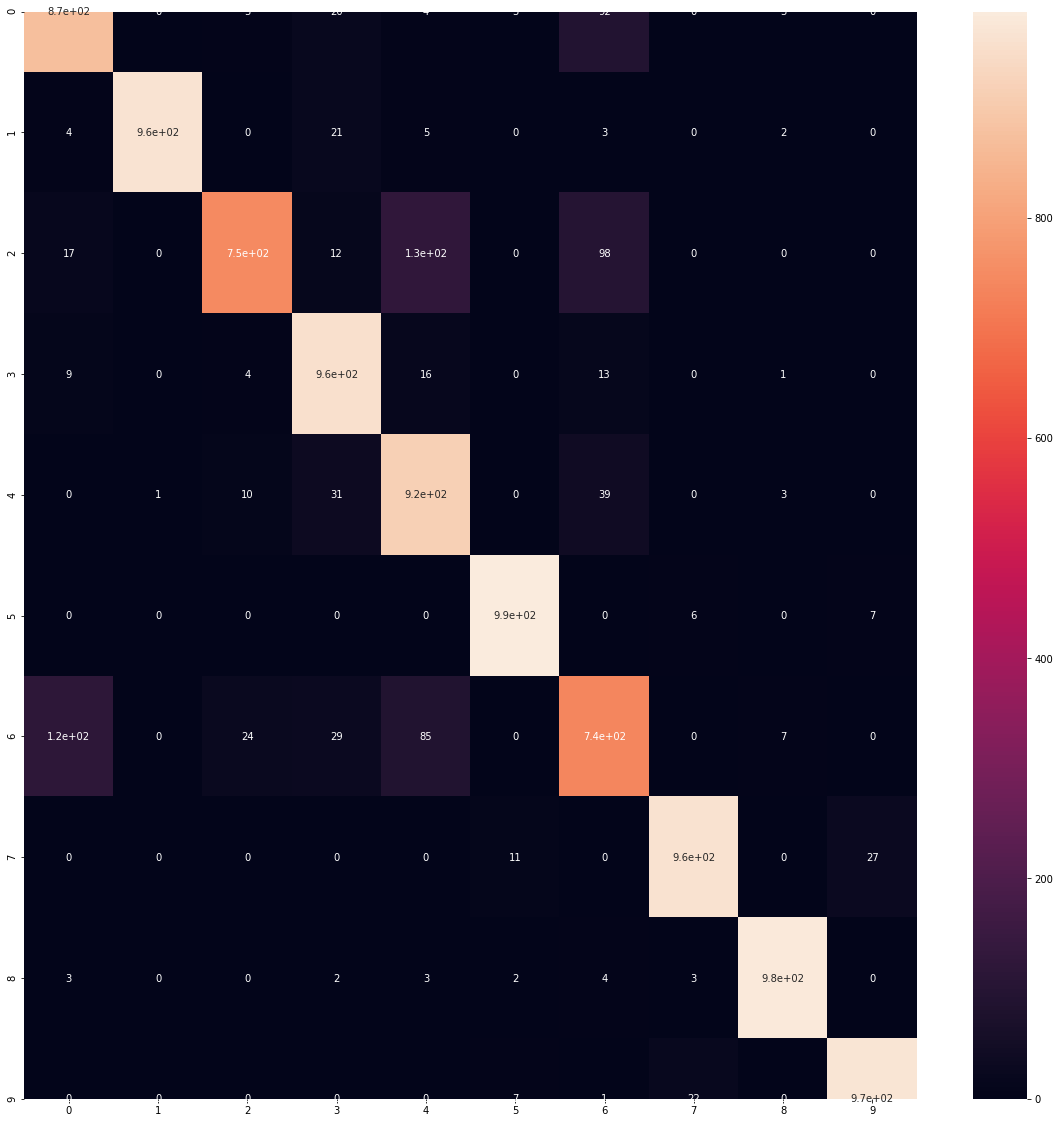

In [27]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)